Kind of like a summary:
1. Consider all local authorities and how many different roads they manage + Graphic of all authorities and the sum of all unique roads. - done x

We can see that the busiest authority has 65 different roads and least busy authority has 9 different roads - done x

3. Which have been the 5 busiest roads on average over the past 20 years in terms of number of vehicles per day? Is the answer different for different types of vehicles? - not sure if we wil do it for different vehicles, but maybe we could do for bikes.

Now that we know a little bit about the roads and authorities let us investigate the vehicles that travel on those very roads

4. We would like to investigate how many bicycles are used in which authorities overall and find out which authorities use them most often. + graphic

5. This doesn’t give us much insight, lets look at them over the years - graphic


then Mariel:
#how many bikes cross the border between scotland and england, 
#and top 5 cities in scotland, coorelation between bike usage 

C:\Users\JStac\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


We have: 495 unique roads.
We have: 32 unique authorities
This is a list of all the authorities and their corresponding  roads they manage:[('Clackmannanshire', 9), ('East Renfrewshire', 9), ('Inverclyde', 9), ('West Dunbartonshire', 10), ('Shetland Islands', 11), ('Dundee City', 12), ('Orkney Islands', 13), ('Comhairle nan Eilean Siar', 14), ('East Dunbartonshire', 14), ('North Ayrshire', 16), ('Renfrewshire', 16), ('Aberdeen City', 17), ('East Lothian', 17), ('Moray', 17), ('Midlothian', 18), ('East Ayrshire', 19), ('South Ayrshire', 20), ('Angus', 22), ('West Lothian', 22), ('Falkirk', 24), ('Stirling', 26), ('City of Edinburgh', 28), ('Glasgow City', 29), ('North Lanarkshire', 30), ('South Lanarkshire', 30), ('Perth & Kinross', 31), ('Argyll & Bute', 34), ('Scottish Borders', 34), ('Fife', 36), ('Aberdeenshire', 37), ('Dumfries & Galloway', 46), ('Highland', 65)].
32


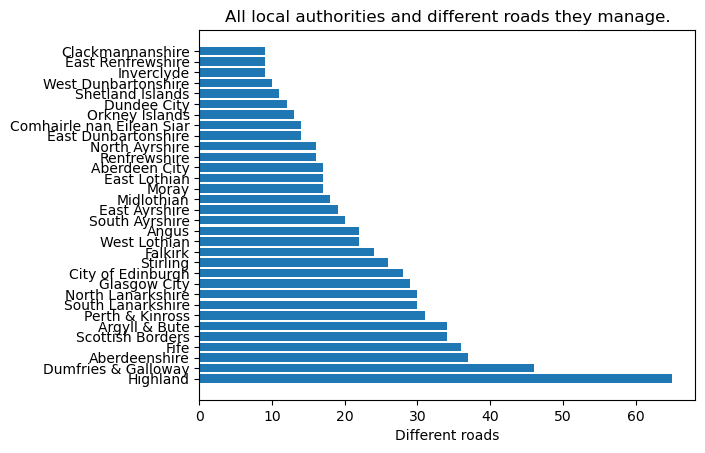

In [1]:
# All Local authorities and how many different roads they manage. when hover over the plot, tells you how many loads
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string

df = pd.read_csv('dft_rawcount_region_id_3.csv')
authorities = sorted(df.local_authority_name.unique())
road_names = sorted(df.road_name.unique())
authority_roads_count = {}
max_roads = 0
highest_roads_authority = ""
for authority in authorities:
    number_of_roads = len(df.loc[(df['local_authority_name'] == authority)]['road_name'].unique())
    authority_roads_count[authority] = number_of_roads
    
print('We have: ' +str(len(road_names))+' unique roads.') # we have 495 different roads

print('We have: '+str(len(authorities))+' unique authorities') # we have 32 different authorities

print('This is a list of all the authorities and their corresponding  roads they manage:' +str(sorted(authority_roads_count.items(), key=lambda item: item[1]))+'.') 
print(len(df.local_authority_name.unique()))

plt.rcdefaults()
fig, ax = plt.subplots()

aut_road_list = sorted(authority_roads_count.items(), key=lambda item: item[1])
authorities = list(zip(*aut_road_list))[0]
roads = list(zip(*aut_road_list))[1]
y_pos = np.arange(len(authorities)) 

ax.barh(y_pos, roads, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(authorities)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Different roads')
ax.set_title('All local authorities and different roads they manage.')

plt.show()



In [2]:
# Based on Li Zhiwen's code: Which local authorities manage the most number of different roads?
import pandas as pd 
import numpy as np

# Read form file
df = pd.read_csv('dft_rawcount_region_id_3.csv')
grouped = df.groupby(by='local_authority_id')

#local authorities id and the different roads they managed
road_managed = grouped['road_name'].unique()

#find which local authority manages the most(least) number of different roads
aut_id = sorted(df.local_authority_id.unique())
road_num=[]
for i in aut_id:
    road_num.append(len(road_managed[i]))
print('The busiest authority is of id {} and it manages {} different roads.'.format(aut_id[road_num.index(max(road_num))],max(road_num)))
print('The least busy authority is of id {} and it manages {} different roads.'.format(aut_id[road_num.index(min(road_num))],min(road_num)))


The busiest authority is of id 35 and it manages 65 different roads.
The least busy authority is of id 48 and it manages 9 different roads.


C:\Users\JStac\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Li Zhiwen's code: 
#Longest road

df.drop(df.index[df['road_name'] == 'U'], inplace = True)
df.drop(df.index[df['road_name'] == 'C'], inplace = True)

#Which road is the longest? Which road has the most number of different counting points along it?
grouped = df.groupby(by='road_name')

#roads and the different counting points they have
cp_road = grouped['count_point_id'].unique()

#find which road has the most number of different counting points
roads = sorted(df.road_name.unique())
cp_num=[]
for i in roads:
    cp_num.append(len(cp_road[i]))
print('The longest road is {} and it has {} different counting points.'.format(roads[cp_num.index(max(cp_num))],max(cp_num)))
print('The longest road is {} and it has {} different counting points.'.format(roads[cp_num.index(min(cp_num))],min(cp_num)))

The longest road is A8 and it has 76 different counting points.
The longest road is A1087 and it has 1 different counting points.


In [4]:
# which have been the 5 busiest roads on average over the past 20 years
# in terms of number of vehicles per day? Is the answer different for different types of vehicles?



In [5]:
# the number of bicycles used by different authorities and which authority uses bicycles most often. + do visualisations
# increased usage of bikes over the years in different authorities

local_bicycles = df.groupby('local_authority_name')['pedal_cycles'].sum()
final_bicycles = {local_authority_id: pedal_cycles for local_authority_id, pedal_cycles in dict(local_bicycles).items()}

print(final_bicycles)
print('Local authority id.{} uses bicycles most often.'.format(max(final_bicycles, key=final_bicycles.get)))


{'Aberdeen City': 13819, 'Aberdeenshire': 3594, 'Angus': 2685, 'Argyll & Bute': 3019, 'City of Edinburgh': 33824, 'Clackmannanshire': 1565, 'Comhairle nan Eilean Siar': 1121, 'Dumfries & Galloway': 5557, 'Dundee City': 2802, 'East Ayrshire': 1207, 'East Dunbartonshire': 2949, 'East Lothian': 4790, 'East Renfrewshire': 2005, 'Falkirk': 4759, 'Fife': 8240, 'Glasgow City': 30020, 'Highland': 10650, 'Inverclyde': 1613, 'Midlothian': 4988, 'Moray': 1730, 'North Ayrshire': 1457, 'North Lanarkshire': 2993, 'Orkney Islands': 1117, 'Perth & Kinross': 5502, 'Renfrewshire': 5608, 'Scottish Borders': 2637, 'Shetland Islands': 392, 'South Ayrshire': 3539, 'South Lanarkshire': 4496, 'Stirling': 5393, 'West Dunbartonshire': 2173, 'West Lothian': 3393}
Local authority id.City of Edinburgh uses bicycles most often.


In [6]:
# get a table of authority and the year and number of bikes - increased usage over the years
import pandas as pd
bike_usage = df.pivot_table(index='year', columns='local_authority_name', values='pedal_cycles', aggfunc=pd.Series.sum)

bike_usage = df.pivot_table(index='local_authority_name', columns='year', values='pedal_cycles', aggfunc=pd.Series.sum)
print(bike_usage)

plt.bike_usage

bike_usage = df.pivot_table(index='year', columns='local_authority_name', values='pedal_cycles', aggfunc=pd.Series.sum)





year                         2000    2001    2002    2003    2004    2005  \
local_authority_name                                                        
Aberdeen City               512.0   912.0   418.0   603.0   630.0   673.0   
Aberdeenshire               207.0   190.0   152.0   266.0   238.0   220.0   
Angus                       257.0   374.0    73.0   227.0   115.0    47.0   
Argyll & Bute                25.0   308.0   139.0   194.0   249.0   260.0   
City of Edinburgh          1543.0   899.0  1957.0  1758.0  1559.0  1038.0   
Clackmannanshire             81.0    33.0    56.0    86.0   112.0    56.0   
Comhairle nan Eilean Siar    31.0    73.0    44.0    69.0    50.0    33.0   
Dumfries & Galloway         425.0   236.0   151.0   212.0   293.0   397.0   
Dundee City                  42.0    81.0     NaN   160.0   206.0   212.0   
East Ayrshire                44.0    42.0    60.0    41.0    35.0     7.0   
East Dunbartonshire           NaN     NaN   101.0   502.0   102.0   222.0   

AttributeError: module 'matplotlib.pyplot' has no attribute 'bike_usage'

In [ ]:
# mistake in here - not sure why it shows a float as a year and 
# why there are so many bikes in the years - that is not true. (see table above)
bike_usage = df.pivot_table(index='year', columns='local_authority_name', values='pedal_cycles', aggfunc=pd.Series.sum)

import seaborn as sns

dd=[bike_usage['Perth & Kinross'],bike_usage['Dundee City'],bike_usage['Glasgow City'],bike_usage['City of Edinburgh'],bike_usage['Aberdeen City']]

ax = sns.lineplot(data=dd)

